# Big Sales Prediction

This model predicts the chances of sale of a particular item based on following information(data):

 1   Item Weight                
 2   Item Fat Content       
 3   ItemVisibility            
 4   Item Type                   
 5   Item MRP                   
 6   Outlet Establishment Year   
 7   Outlet Size                 
 7   Outlet Location Type        
 9   Outlet Type  etc.

#Data Source

 Data is taken from YBI Foundation Dataset Click below link to access the dataset:

[YBI Dataset (Github)](https://github.com/YBI-Foundation/Dataset)

#import library

In [61]:
import pandas as pd

# Import *Data*

In [62]:
sales = pd.read_csv ('https://github.com/YBI-Foundation/Dataset/raw/main/Big%20Sales%20Data.csv')

#Describe Data

In [63]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


#Data Visualization

In [64]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [65]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [66]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

#Get missing values complete

In [144]:

sales['Item_Weight'].fillna(sales.groupby('Item_Type')['Item_Weight'].transform('mean'), inplace=True)

# Define target variable (y) and features variable (x)

In [145]:
sales[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [146]:
sales[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [148]:

sales.replace({'Item_Fat_Content':{'LF':'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}}, inplace = True)

In [149]:
sales[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [150]:
sales.replace({'Item_Fat_Content': {'Low Fat': 0,'Regular':1}}, inplace = True )

In [151]:
sales[['Item_Fat_Content']].value_counts()

Item_Fat_Content
0                   9185
1                   5019
dtype: int64

In [152]:
sales[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [153]:
sales.replace({'Item_Type': { 'Fruits and Vegetables': 0, 'Snack Foods':0, 'Household': 1, 'Frozen Foods': 0, 'Dairy':0,
                             'Baking Goods': 0, 'Canned': 0, 'Health and Hygiene': 1, 'Meat': 0, 'Soft Drinks': 0,
                              'Breads': 0, 'Hard Drinks': 0, 'Others': 2, 'Starchy Foods': 0, 'Breakfast': 0, 'Seafood': 0, }}, inplace = True)

In [154]:
sales[['Item_Type']].value_counts()

Item_Type
0            11518
1             2406
2              280
dtype: int64

In [155]:
sales[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [156]:
sales.replace({'Outlet_Identifier':{ 'OUT027':0, 'OUT013':1, 'OUT035':2, 'OUT046':3, 'OUT049':4, 'OUT045':5,
                                    'OUT018':6, 'OUT017':7, 'OUT010':8, 'OUT019':9}}, inplace = True)

In [157]:
sales[['Outlet_Identifier']].value_counts()

Outlet_Identifier
0                    1559
1                    1553
2                    1550
3                    1550
4                    1550
5                    1548
6                    1546
7                    1543
8                     925
9                     880
dtype: int64

In [158]:
sales[['Outlet_Size']].value_counts()

Outlet_Size
1              7122
0              5529
2              1553
dtype: int64

In [159]:
sales.replace({'Outlet_Size':{'Medium':1, 'Small':0, 'High':2,}}, inplace= True)

In [160]:
sales[['Outlet_Location_Type']].value_counts()


Outlet_Location_Type
2                       5583
1                       4641
0                       3980
dtype: int64

In [161]:
sales.replace({'Outlet_Location_Type':{'Tier 3': 2, 'Tier 2':1, 'Tier 1':0}}, inplace = True)

In [162]:
sales[['Outlet_Type']].value_counts()

Outlet_Type
0              9294
1              1805
2              1559
3              1546
dtype: int64

In [163]:
sales.replace({'Outlet_Type':{'Supermarket Type1':0, 'Grocery Store': 1, 'Supermarket Type3':2, 'Supermarket Type2':3}}, inplace =True)

In [164]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,0,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,0,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,3,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,1,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,0,352.874000


In [165]:
y= sales['Item_Outlet_Sales']

In [166]:
y.shape

(14204,)

In [167]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [168]:
from math import nan
x= sales.drop(['Item_Identifier','Item_Outlet_Sales' ],axis=1)

#standardization of x variables

In [169]:
from sklearn.preprocessing import StandardScaler


In [170]:
sc= StandardScaler()

In [171]:
x_std = sales[['Item_Weight','Item_Visibility',
       'Item_MRP','Outlet_Establishment_Year']]

In [172]:
x_std= sc.fit_transform(x_std)

In [173]:
x_std

array([[-0.11517473,  0.88413635, -1.73178716,  0.13968068],
       [-0.11517473,  0.89300616, -1.72373366,  1.09531886],
       [-0.11517473,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00257884,  0.07011952,  1.96538148, -1.29377659],
       [-0.03032192,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00257884,  0.07334891,  1.97504569,  0.13968068]])

In [174]:
x[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']]= pd.DataFrame(x_std, columns=[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']])

In [175]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.115175,0,0.884136,0,-1.731787,4,0.139681,1,0,0
1,-0.115175,0,0.893006,0,-1.723734,7,1.095319,1,1,0
2,-0.115175,0,0.889583,0,-1.723734,6,1.334228,1,2,3
3,-0.115175,0,-1.281712,0,-1.717291,9,-1.532686,0,0,1
4,-0.703943,1,-0.397031,0,-1.706016,7,1.095319,1,1,0
...,...,...,...,...,...,...,...,...,...,...
14199,0.002579,0,0.070990,0,1.947664,2,0.736955,0,1,0
14200,0.002579,0,0.078898,0,1.962160,7,1.095319,1,1,0
14201,0.002579,0,0.070120,0,1.965381,1,-1.293777,2,2,0
14202,-0.030322,0,0.064694,0,1.973435,0,-1.532686,1,2,2


#Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state = 2529)

In [177]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((11363, 10), (2841, 10), (11363,), (2841,))

#Modeling

In [178]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
model=RandomForestRegressor(random_state = 2529)

In [181]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=2529)

#Get Model Prediction


In [183]:
y_pred = model.predict(x_test)

In [184]:
y_pred

array([1511.58156305,  687.06500299, 1994.26010414, ..., 3194.37362248,
        600.86889632, 1012.17541218])

#Get Model Evaluation

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, balanced_accuracy_score, r2_score

In [186]:
mean_squared_error(y_test, y_pred)

1485119.3153551794

In [187]:
mean_absolute_error(y_test, y_pred)

806.9040638822313

In [189]:
r2_score(y_test, y_pred)

0.5523454504252736

#actual viualization of  the predicted results

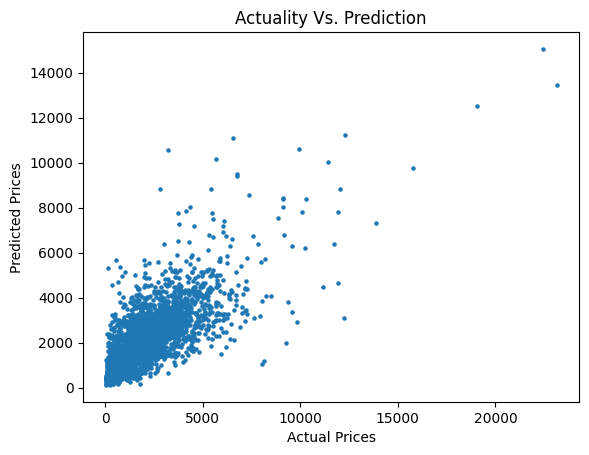

In [196]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred, s=5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actuality Vs. Prediction")
plt.show()